In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
44,ham,Great! I hope you like your man well endowed. ...,NaN,NaN,NaN
4295,spam,Please CALL 08712402578 immediately as there i...,NaN,NaN,NaN
1744,spam,Someone has conacted our dating service and en...,NaN,NaN,NaN
4704,ham,Hey anyway i have to :-),NaN,NaN,NaN
3608,ham,Joy's father is John. Then John is the ____ of...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

##**Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# remove the last three columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
df.sample(5)

,v1,v2
466,ham,They don't put that stuff on the roads to keep...
841,ham,Pls send me a comprehensive mail about who i'm...
907,ham,I.ll give her once i have it. Plus she said gr...
2322,ham,Should I be stalking u?
4455,ham,If you want to mapquest it or something look u...


In [ ]:
# rename the columns
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)

In [ ]:
df.sample(5)

,target,text
3659,ham,I will reach ur home in &lt;#&gt; minutes
1083,ham,Wat makes some people dearer is not just de ha...
4011,ham,Discussed with your mother ah?
5194,ham,Ok... Take ur time n enjoy ur dinner...
1950,ham,Oh ic. I thought you meant mary jane.


In [ ]:
# label encode the target values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df["target"] = encoder.fit_transform(df["target"])

In [ ]:
df.sample(5)

,target,text
3064,0,"Sounds good, keep me posted"
1625,0,Hi Dear Call me its urgnt. I don't know whats ...
1545,0,"Good afternoon, my love ! Any job prospects ? ..."
0,0,"Go until jurong point, crazy.. Available only ..."
814,1,U were outbid by simonwatson5120 on the Shinco...


In [ ]:
# any missing values?
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# any duplicates?
df.duplicated().sum()

np.int64(403)

In [ ]:
# drop duplicates
df.drop_duplicates(keep = "first", inplace = True)

In [ ]:
# check again
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

##**Exploratory Data Analysis(EDA)**

In [ ]:
# Analyzing Class Distribution
df['target'].value_counts()

,count
target,
0,4516
1,653


The Data is Imbalanced, with ham being the Majority Class


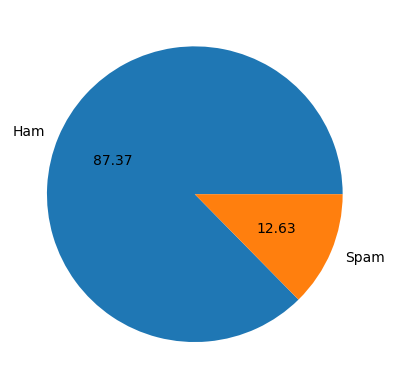

In [ ]:
plt.pie(df['target'].value_counts(), labels = ['Ham', 'Spam'], autopct = "%0.2f")
print("The Data is Imbalanced, with ham being the Majority Class")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# no of charaters in the text
df['num_characters'] = df['text'].apply(len)

In [ ]:
# no of words in the text
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
# no of sentences in the text
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
# Summary Statistics for ham messages
df[df.target == 0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Summary Statistics for spam messages
df[df.target == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


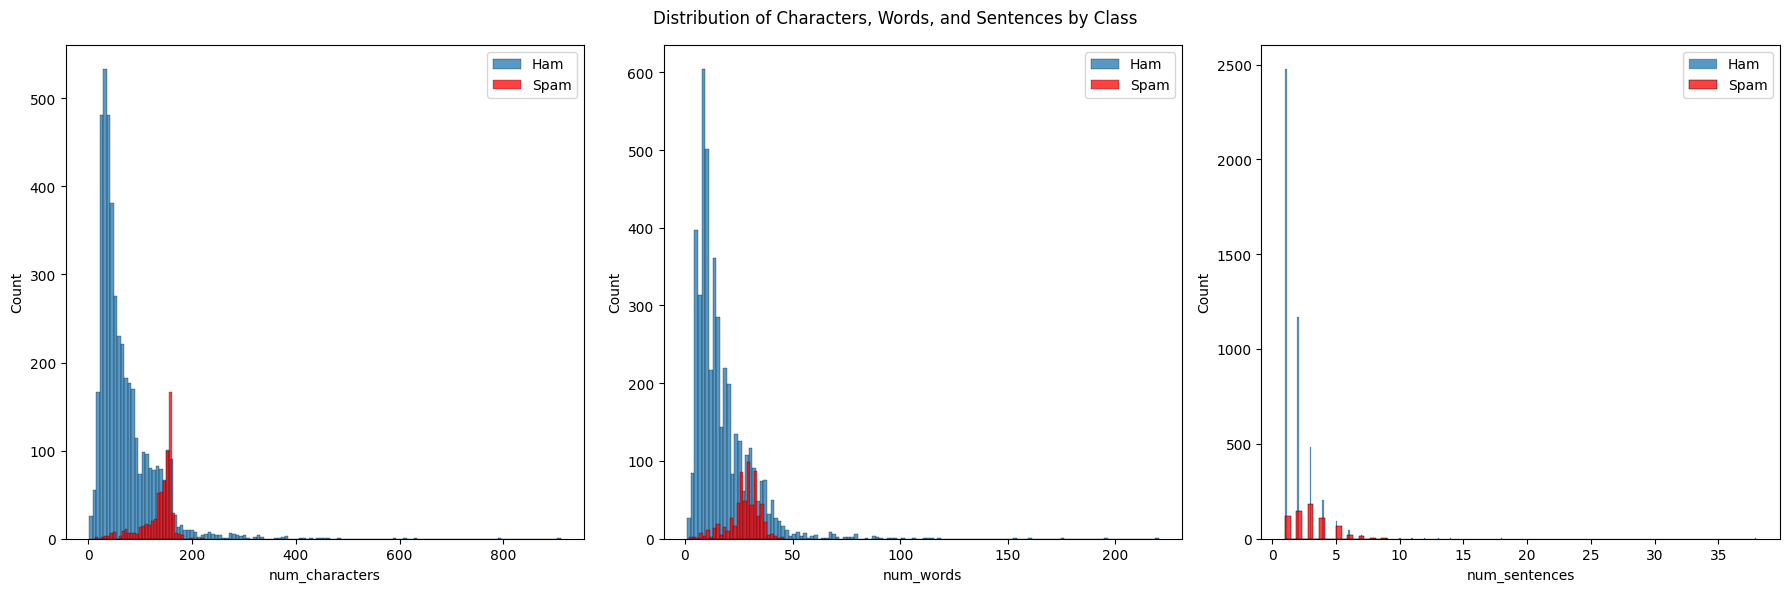

In [ ]:
# Distribution of Characters, Words, and Sentences by Class
fig,(ax0, ax1, ax2) = plt.subplots(1,3, figsize = (18, 6))

sns.histplot(df[df.target== 0]['num_characters'], ax = ax0)
sns.histplot(df[df.target == 1]['num_characters'], color = 'red', ax = ax0)
ax0.legend(['Ham', 'Spam'])

sns.histplot(df[df.target== 0]['num_words'], ax = ax1)
sns.histplot(df[df.target == 1]['num_words'], color = 'red', ax = ax1)
ax1.legend(['Ham', 'Spam'])

sns.histplot(df[df.target== 0]['num_sentences'], ax = ax2)
sns.histplot(df[df.target == 1]['num_sentences'], color = 'red', ax = ax2)
ax2.legend(['Ham', 'Spam'])

plt.suptitle("Distribution of Characters, Words, and Sentences by Class")
plt.tight_layout()
plt.show()

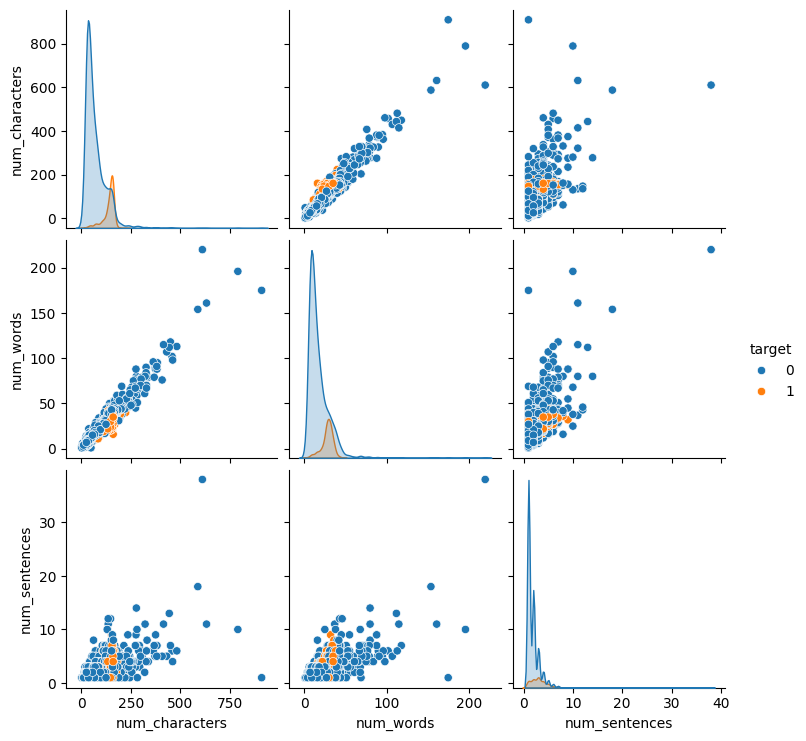

In [ ]:
# Visualizing pairwise relationships between Numeric Features
sns.pairplot(df, hue = "target")
plt.show()

Strong Multi-Collinearity exists between the features, so only one of these features would be selected for model building


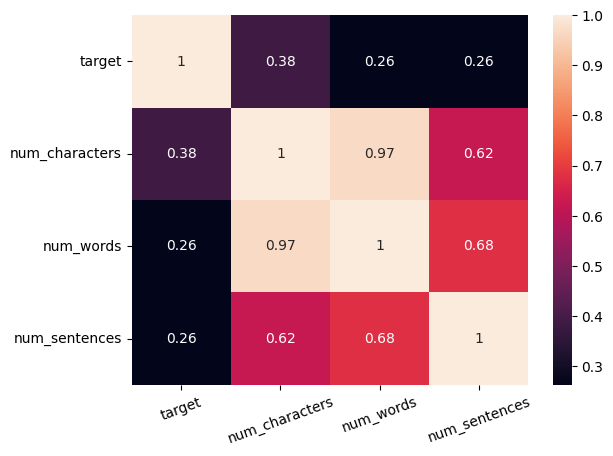

In [ ]:
# Let's check the Correlation between the features
print("Strong Multi-Collinearity exists between the features, so only one feature would be selcted for model building")
sns.heatmap(df.corr(numeric_only = True),  annot = True)
plt.xticks(rotation = 20)
plt.show()

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk.tokenize import word_tokenize

In [ ]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))  # Load stopwords once

# Custom Fumction to apply Text Preprocessing
def transform_text(text):
    text = text.lower()  # Convert text to lowercase

    text = nltk.word_tokenize(text)  # Split text into individual words

    y = []
    # Keep only alphanumeric words (no punctuation or special characters)
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    # Remove stopwords and punctuation
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # Apply stemming to reduce words to their base form
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)  # Return cleaned text as a single string

In [ ]:
# Applying text preprocessing to the text column and saving the result in a new column for Analysis
df["transformed_text"] = df["text"].apply(transform_text)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df.target == 1]["transformed_text"].str.cat(sep = " "))
ham_wc = wc.generate(df[df.target == 0]["transformed_text"].str.cat(sep = " "))

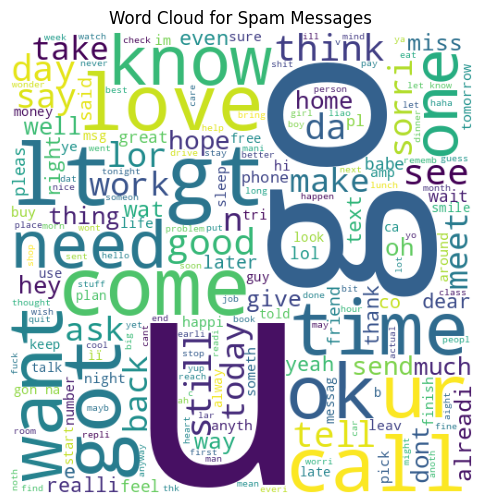

In [ ]:
# Visualizing the Word Cloud for Spam Messages
fig,ax = plt.subplots(figsize = (15, 6))
plt.imshow(spam_wc)
plt.title("Word Cloud for Spam Messages")
plt.axis('off')
plt.show()

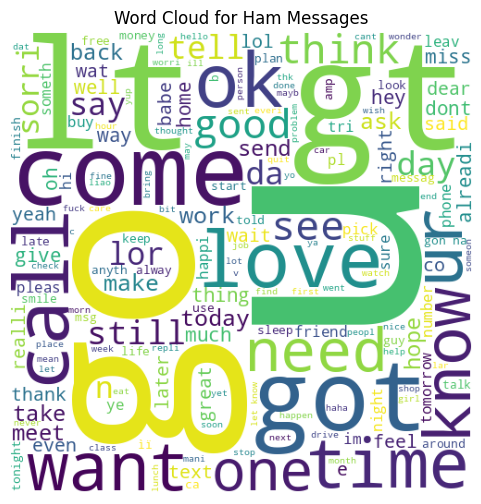

In [ ]:
# Visualizing the Word Cloud for Ham Messages
fig,ax = plt.subplots(figsize = (15, 6))
plt.imshow(ham_wc)
plt.title("Word Cloud for Ham Messages")
plt.axis('off')
plt.show()

In [ ]:
spam_corpus = []

for msg in df[df.target == 1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
ham_corpus = []

for msg in df[df.target == 0]["transformed_text"].tolist():
  for word in msg.split():
    ham_corpus.append(word)

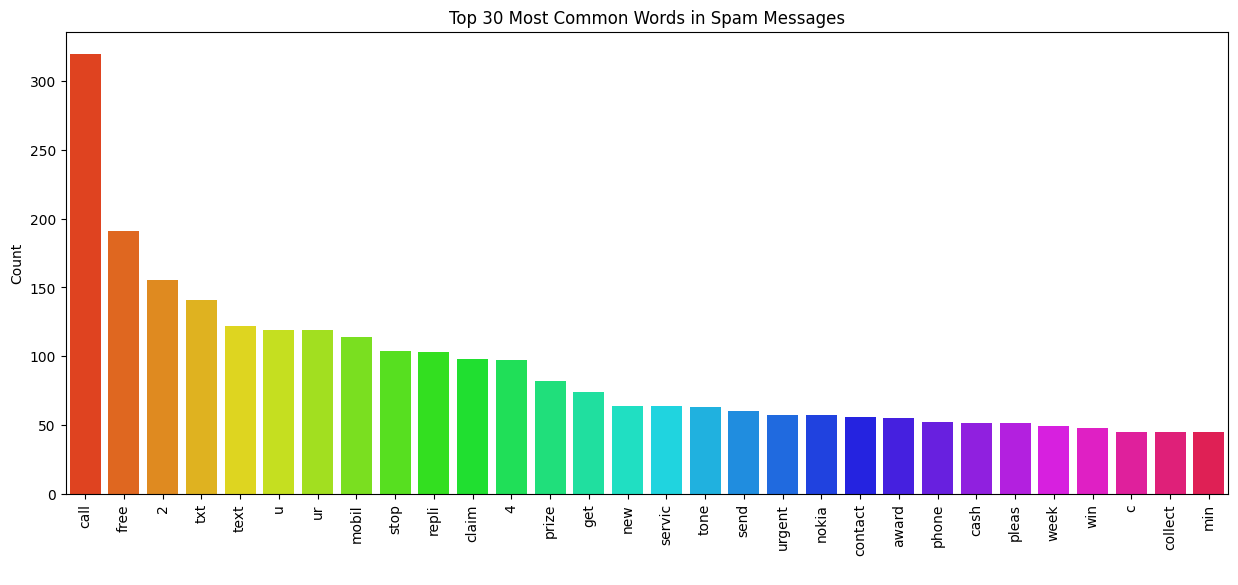

In [ ]:
# Top 30 Most Common Words in Spam Messages
from collections import Counter
top_30_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

fig,ax = plt.subplots(figsize = (15, 6))
color = sns.color_palette('hsv', 30)
sns.barplot(x = top_30_spam_words[0], y = top_30_spam_words[1], hue = top_30_spam_words[0], data = top_30_spam_words, palette = color, ax = ax)

ax.set_title("Top 30 Most Common Words in Spam Messages")
ax.set_xlabel(" ")
ax.set_ylabel("Count")

plt.xticks(rotation = 90)
plt.show()

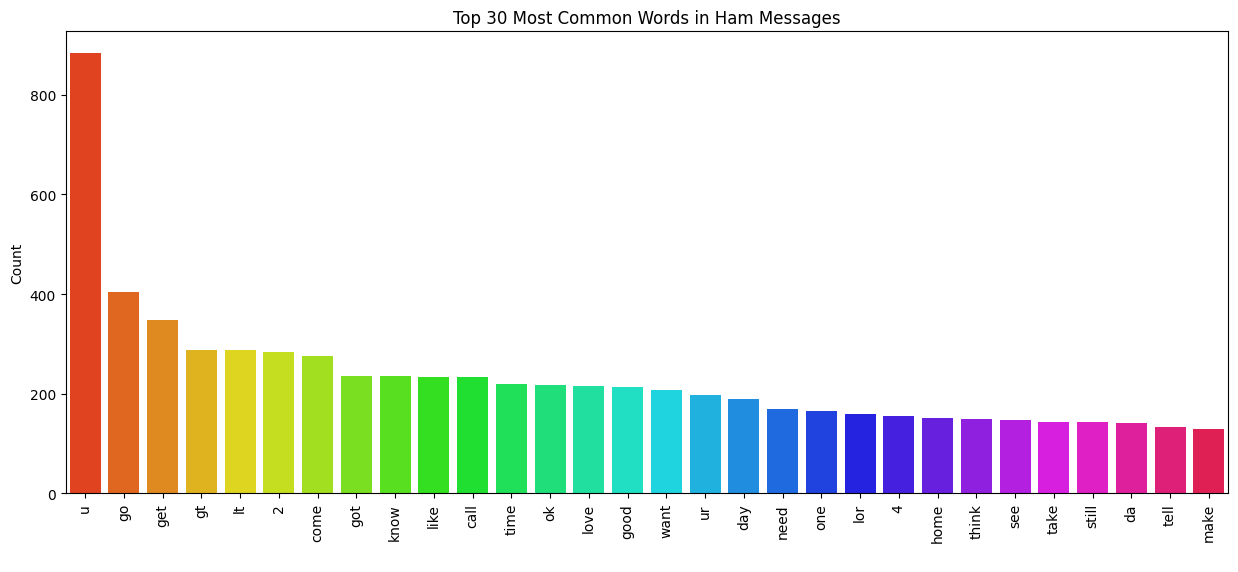

In [ ]:
# Top 30 Most Common Words in Ham Messages
from collections import Counter
top_30_Ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30))

fig,ax = plt.subplots(figsize = (15, 6))
color = sns.color_palette('hsv', 30)
sns.barplot(x = top_30_Ham_words[0], y = top_30_Ham_words[1], hue = top_30_Ham_words[0], data = top_30_Ham_words, palette = color, ax = ax)

ax.set_title("Top 30 Most Common Words in Ham Messages")
ax.set_xlabel(" ")
ax.set_ylabel("Count")

plt.xticks(rotation = 90)
plt.show()

##**Data Splitting**

In [ ]:
# # Separate the data into feature and target variables
X = df[["text"]]  # pandas DataFrame
y = df["target"]  # pandas Series

In [ ]:
# Split the data to train and test sets
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

##**Data Preprocessing**

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Custom transformer to apply transform_text to text data
class TextCleaner(BaseEstimator, TransformerMixin):
  def fit(self, X, y = None):
    return self

  def transform(self, X):
    if isinstance(X, pd.Series):
      return X.apply(transform_text)
    elif isinstance(X, np.ndarray):
      return pd.Series(X.ravel()).apply(transform_text)
    else:
      return pd.Series(X).apply(transform_text)

# Function to convert numeric data to sparse matrix (avoids sparse-dense mix errors)
def to_sparse(X):
  return sparse.csr_matrix(X)

to_sparse_transformer = FunctionTransformer(to_sparse, accept_sparse = True)

#---------------------------------------------------

# Preprocessing pipelines

# Text pipeline
text_pipeline = Pipeline([
    ('text_cleaner', TextCleaner()),
    ('text_vectorizer', TfidfVectorizer(max_features = 3000))
    # ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse = True)),       # Uncomment if wanna use it
    # ('scaler', MinMaxScaler())
])

# Numeric pipeline (for features like 'num_characters' etc)
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),           # Scaling optional
    ('to_sparse', to_sparse_transformer)    # Convert to sparse for TF-IDF compatibility
])

# Full preprocessing pipeline
full_preprocessing = ColumnTransformer([
    ('text', text_pipeline, 'text')
    # ('num', num_pipeline, ['num_characters'])    # Uncomment if wanna use it
])

In [ ]:
X_train_trf = full_preprocessing.fit_transform(X_train)
X_test_trf = full_preprocessing.transform(X_test)

##**Model Building**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, precision_score

In [ ]:
nb_models = {
    "Gaussian NB": Pipeline([
        ('preprocessing', full_preprocessing),
        ('to_dense', FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x, accept_sparse=True)),
        ('clf', GaussianNB())
    ]),

    "Multinomial NB": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf1', MultinomialNB())
    ]),

    "Bernoulli NB": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf2', BernoulliNB())
    ])
}

In [ ]:
def fit_and_score_cv(models, X_train, y_train, cv = 5):
    """
    Evaluates models using cross-validation.
    Returns a list of tuples: (model_name, accuracy, precision)
    """
    np.random.seed(42)
    results = []

    for name, model in models.items():
        scores = cross_validate(
            model,
            X_train,
            y_train,
            cv = cv,
            scoring = {
                'accuracy': 'accuracy',
                'precision': make_scorer(precision_score, zero_division = 0)
            },
            n_jobs = -1
        )
        # `cross_validate()` returns a dictionary with keys like 'test_accuracy' and 'test_precision', based on the names provided in the `scoring` dictionary.
        acc = scores['test_accuracy'].mean()
        prec = scores['test_precision'].mean()
        results.append((name, round(acc, 4), round(prec, 4)))

    return results

Upon using TfidfVectorizer, Multinomial NB has the best Precision Score, so we'll chose it!


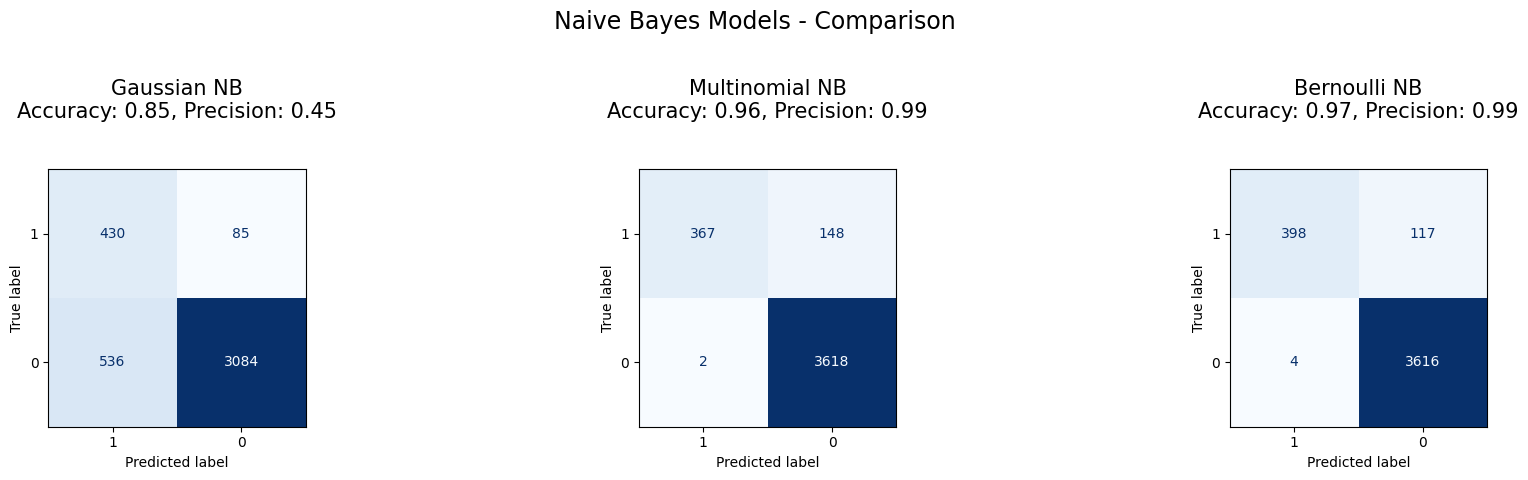

In [ ]:
print("Upon using TfidfVectorizer, Multinomial NB has the best Precision Score, so we'll chose it!")
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
fig.suptitle("Naive Bayes Models - Comparison", fontsize = 17)

for ax, (name, model) in zip(axes, nb_models.items()):
    # Get cross-validated predictions on training set
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv = 5)

    # Calculate metrics
    acc = accuracy_score(y_train, y_pred_cv)
    prec = precision_score(y_train, y_pred_cv, zero_division = 0)

    # Display confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_cv, ax = ax, cmap = 'Blues', colorbar = False)
    ax.set_title(f"{name}\nAccuracy: {acc:.2f}, Precision: {prec:.2f}\n", fontsize = 15, pad = 20)
    ax.invert_yaxis()
    ax.invert_xaxis()

plt.tight_layout(rect = [0, 0.03, 1, 0.95])   # Adjust layout to fit the suptitle
plt.show()

In [ ]:
# using some more classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [ ]:
models = {
    "Logistic Regression": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf', lrc)
    ]),

    "SVC": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf1', svc)
    ]),

    "Multinomial NB": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf2', mnb)
    ]),

    "Decision Tree": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf3', dtc)
    ]),

    "KNN": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf4', knc)
    ]),

    "Random Forest": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf5', rfc)
    ]),

    "AdaBoost": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf6', abc)
    ]),

    "Bagging": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf7', bc)
    ]),

    "Extra Trees": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf8', etc)
    ]),

    "Gradient Boosting": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf9', gbdt)
    ]),

    "XGBoost": Pipeline([
        ('preprocessing', full_preprocessing),
        ('clf10', xgb)
    ])
}

In [ ]:
performance = fit_and_score_cv(models, X_train, y_train)

In [ ]:
performance_df = pd.DataFrame(performance, columns = ["Model", "Accuracy", "Precision"]).sort_values(by = "Precision", ascending = False)
performance_df

,Model,Accuracy,Precision
4,KNN,0.9033,1.0000
2,Multinomial NB,0.9538,0.9970
5,Random Forest,0.9686,0.9923
8,Extra Trees,0.9707,0.9717
1,SVC,0.9751,0.9676
9,Gradient Boosting,0.9526,0.9617
10,XGBoost,0.9630,0.9314
0,Logistic Regression,0.9519,0.9094
7,Bagging,0.9572,0.8853
3,Decision Tree,0.9369,0.8614


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = ["Model"])
performance_df1

,Model,variable,value
0,KNN,Accuracy,0.9033
1,Multinomial NB,Accuracy,0.9538
2,Random Forest,Accuracy,0.9686
3,Extra Trees,Accuracy,0.9707
4,SVC,Accuracy,0.9751
5,Gradient Boosting,Accuracy,0.9526
6,XGBoost,Accuracy,0.9630
7,Logistic Regression,Accuracy,0.9519
8,Bagging,Accuracy,0.9572
9,Decision Tree,Accuracy,0.9369


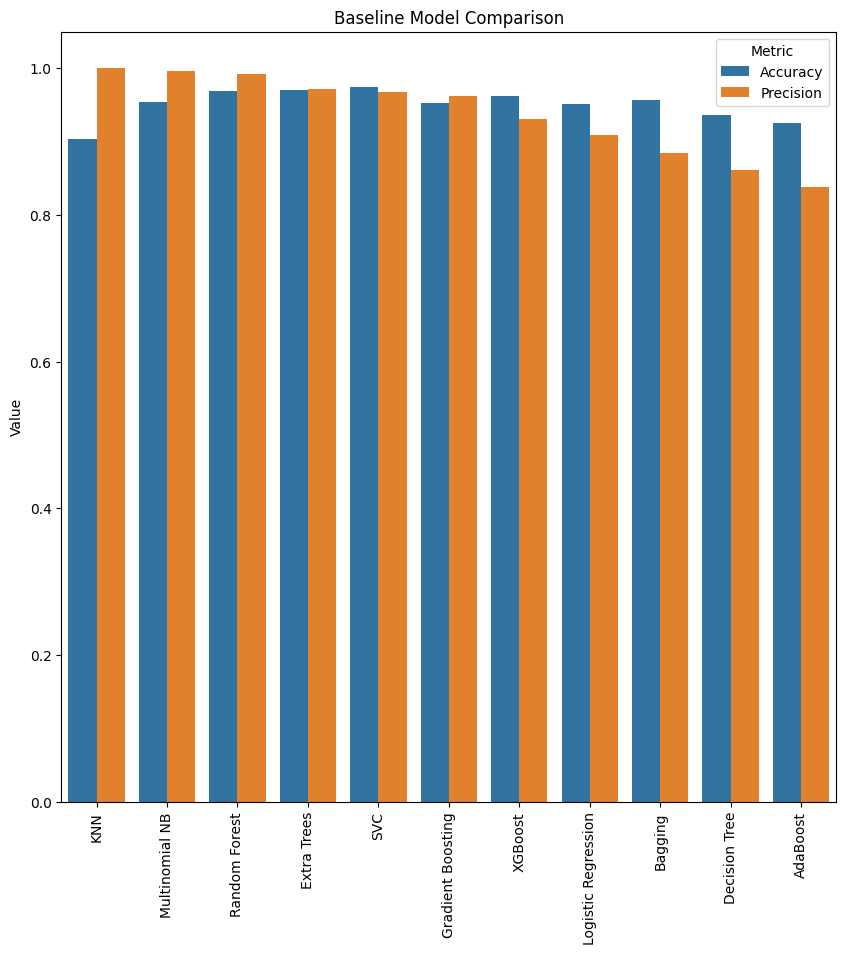

In [ ]:
fig,ax = plt.subplots(figsize = (10, 10))
sns.barplot(x = "Model", y = "value", hue = "variable", data = performance_df1, ax = ax)
ax.set_title("Baseline Model Comparison")
ax.set_xlabel(" ")
ax.set_ylabel("Value")
ax.legend(title = 'Metric')
plt.xticks(rotation = 90)
plt.show()

##**Improving Model Performance**

In [ ]:
# Custom transformer to apply transform_text to text data
class TextCleaner(BaseEstimator, TransformerMixin):
  def fit(self, X, y = None):
    return self

  def transform(self, X):
    if isinstance(X, pd.Series):
      return X.apply(transform_text)
    elif isinstance(X, np.ndarray):
      return pd.Series(X.ravel()).apply(transform_text)
    else:
      return pd.Series(X).apply(transform_text)

# Function to convert numeric data to sparse matrix (avoids sparse-dense mix errors)
def to_sparse(X):
  return sparse.csr_matrix(X)

to_sparse_transformer = FunctionTransformer(to_sparse, accept_sparse = True)

#---------------------------------------------------

# Preprocessing pipelines

# Text pipeline
text_pipeline = Pipeline([
    ('text_cleaner', TextCleaner()),
    ('text_vectorizer', TfidfVectorizer(max_features = 3000))
    # ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse = True)),       # Uncomment if wanna use it
    # ('scaler', MinMaxScaler())
])

# Numeric pipeline (for features like 'num_characters' etc)
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),           # Scaling optional
    ('to_sparse', to_sparse_transformer)    # Convert to sparse for TF-IDF compatibility
])

# Full preprocessing pipeline
full_preprocessing = ColumnTransformer([
    ('text', text_pipeline, 'text'),
    ('num', num_pipeline, ['num_characters'])    # Uncomment if wanna use it
])

In [ ]:
# Changing the max_features parameter in TfidfVectorizer(results)
perf_max_ft = fit_and_score_cv(models, X_train, y_train)
temp_df = pd.DataFrame(perf_max_ft, columns = ["Model", "Accuracy_upon_max_ft_3000", "Precision_upon_max_ft_3000"]).sort_values(by = "Precision_upon_max_ft_3000", ascending = False)

In [ ]:
new_df_max_ft_3000 = performance_df.merge(temp_df, on = 'Model')

In [ ]:
print("It seems that changing the max_features in TfidfVectorizer, is beneficial to the performance of the models")
new_df_max_ft_3000

It seems that changing the max_features in TfidfVectorizer, is beneficial to the performance of the models


,Model,Accuracy,Precision,Accuracy_upon_max_ft_3000,Precision_upon_max_ft_3000
0,KNN,0.9033,1.0000,0.9086,0.9933
1,Multinomial NB,0.9538,0.9970,0.9637,0.9943
2,Random Forest,0.9686,0.9923,0.9712,0.9855
3,Extra Trees,0.9707,0.9717,0.9736,0.9669
4,SVC,0.9751,0.9676,0.9746,0.9672
5,Gradient Boosting,0.9526,0.9617,0.9538,0.9618
6,XGBoost,0.9630,0.9314,0.9649,0.9341
7,Logistic Regression,0.9519,0.9094,0.9543,0.9228
8,Bagging,0.9572,0.8853,0.9596,0.8753
9,Decision Tree,0.9369,0.8614,0.9359,0.8340


In [ ]:
# Applying scaling to TF‑IDF results, especially MinMax Scaler(results)
perf_scaling = fit_and_score_cv(models, X_train, y_train)
temp_df1 = pd.DataFrame(perf_scaling, columns = ["Model", "Accuracy_upon_scaling", "Precision_upon_scaling"]).sort_values(by = "Precision_upon_scaling", ascending = False)

In [ ]:
new_df_scaling = new_df_max_ft_3000.merge(temp_df1, on = 'Model')

In [ ]:
print("It seems that scaling doesn't help much!")
new_df_scaling

It seems that scaling doesn't help much!


,Model,Accuracy,Precision,Accuracy_upon_max_ft_3000,Precision_upon_max_ft_3000,Accuracy_upon_scaling,Precision_upon_scaling
0,KNN,0.9033,1.0000,0.9086,0.9933,0.9033,1.0000
1,Multinomial NB,0.9538,0.9970,0.9637,0.9943,0.9538,0.9970
2,Random Forest,0.9686,0.9923,0.9712,0.9855,0.9686,0.9923
3,Extra Trees,0.9707,0.9717,0.9736,0.9669,0.9707,0.9717
4,SVC,0.9751,0.9676,0.9746,0.9672,0.9751,0.9676
5,Gradient Boosting,0.9526,0.9617,0.9538,0.9618,0.9526,0.9617
6,XGBoost,0.9630,0.9314,0.9649,0.9341,0.9630,0.9314
7,Logistic Regression,0.9519,0.9094,0.9543,0.9228,0.9519,0.9094
8,Bagging,0.9572,0.8853,0.9596,0.8753,0.9572,0.8853
9,Decision Tree,0.9369,0.8614,0.9359,0.8340,0.9369,0.8617


In [ ]:
# Using the "num_characters" in the input X
X = df[["text", "num_characters"]]
y = df["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
X_train.shape

(4135, 2)

In [ ]:
perf_nc = fit_and_score_cv(models, X_train, y_train)
temp_df2 = pd.DataFrame(perf_nc, columns = ["Model", "Accuracy_upon_num_characters", "Precision_upon_num_characters"]).sort_values(by = "Precision_upon_num_characters", ascending = False)

In [ ]:
new_df_nc = new_df_scaling.merge(temp_df2, on = 'Model')

In [ ]:
print("It seems using 'num_characters' in the input X, doesn't help much!")
new_df_nc

It seems using 'num_characters' in the input X, doesn't help much!


,Model,Accuracy,Precision,Accuracy_upon_max_ft_3000,Precision_upon_max_ft_3000,Accuracy_upon_scaling,Precision_upon_scaling,Accuracy_upon_num_characters,Precision_upon_num_characters
0,KNN,0.9033,1.0000,0.9086,0.9933,0.9033,1.0000,0.9033,1.0000
1,Multinomial NB,0.9538,0.9970,0.9637,0.9943,0.9538,0.9970,0.9538,0.9970
2,Random Forest,0.9686,0.9923,0.9712,0.9855,0.9686,0.9923,0.9686,0.9923
3,Extra Trees,0.9707,0.9717,0.9736,0.9669,0.9707,0.9717,0.9707,0.9717
4,SVC,0.9751,0.9676,0.9746,0.9672,0.9751,0.9676,0.9751,0.9676
5,Gradient Boosting,0.9526,0.9617,0.9538,0.9618,0.9526,0.9617,0.9526,0.9617
6,XGBoost,0.9630,0.9314,0.9649,0.9341,0.9630,0.9314,0.9630,0.9314
7,Logistic Regression,0.9519,0.9094,0.9543,0.9228,0.9519,0.9094,0.9519,0.9094
8,Bagging,0.9572,0.8853,0.9596,0.8753,0.9572,0.8853,0.9572,0.8853
9,Decision Tree,0.9369,0.8614,0.9359,0.8340,0.9369,0.8617,0.9369,0.8594


##**Ensemble Learning Techniques**

In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

base_models_vc = [
('mnb', MultinomialNB()),
('etc', ExtraTreesClassifier(n_estimators = 50, random_state = 2)),
('svc', SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)),
('xgb', XGBClassifier(n_estimators = 50, random_state = 2))
]

In [ ]:
# Define the Voting Classifier
voting_clf = VotingClassifier(estimators = base_models_vc, voting = 'soft')

In [ ]:
# Wrap the Voting Classifier inside a Pipeline
voting_pipeline = Pipeline([
    ('preprocessing', full_preprocessing),
    ('voting', voting_clf)
])

In [ ]:
# Train the Voting Classifier
voting_pipeline.fit(X_train, y_train)

# Predict on X_test
y_pred = voting_pipeline.predict(X_test)

print("Accuracy Score for Voting Classifier:", accuracy_score(y_test, y_pred))
print("Precision Score for Voting Classifier:", precision_score(y_test, y_pred, zero_division = 0))

Accuracy Score for Voting Classifier: 0.9816247582205029
Precision Score for Voting Classifier: 1.0


In [ ]:
# Stacking Classifier
from sklearn.ensemble import StackingClassifier

base_models_sc = [
('mnb', MultinomialNB()),
('etc', ExtraTreesClassifier(n_estimators = 50, random_state = 2)),
('svc', SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)),
('xgb', XGBClassifier(n_estimators = 50, random_state = 2))
]

final_model_vc = RandomForestClassifier(n_estimators = 100, random_state = 2)

In [ ]:
# Define the Stacking Classifier
stacking_clf = StackingClassifier(estimators = base_models_sc, final_estimator = final_model_vc)

In [ ]:
# Wrap the Stacking Classifier inside a Pipeline
stacking_pipeline = Pipeline([
    ('preprocessing', full_preprocessing),
    ('stacking', stacking_clf)
])

In [ ]:
# Train the Stacking Classifier
stacking_pipeline.fit(X_train, y_train)

# Predict on X_test
y_pred1 = stacking_pipeline.predict(X_test)

print("Accuracy Score for Stacking Classifier:", accuracy_score(y_test, y_pred1))
print("Precision Score for Stacking Classifier:", precision_score(y_test, y_pred1, zero_division = 0))

Accuracy Score for Stacking Classifier: 0.9825918762088974
Precision Score for Stacking Classifier: 0.96875


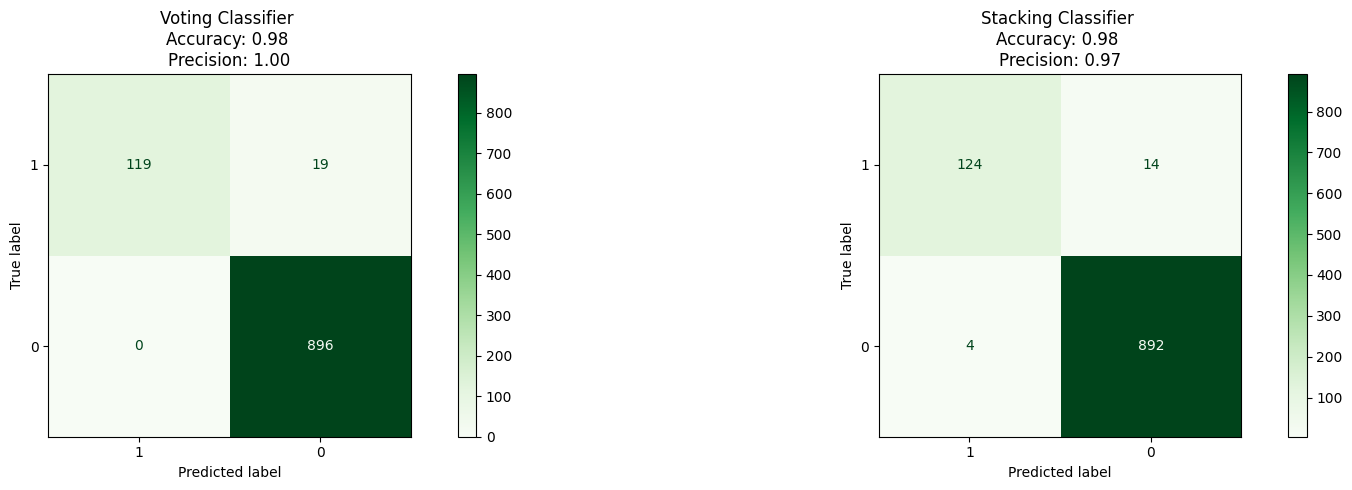

In [ ]:
# Confusion Matrix for Voting and Stacking Classifier

# Model Predictions
y_pred_vc = voting_pipeline.predict(X_test)
y_pred_sc = stacking_pipeline.predict(X_test)

# Accuracy and Precision Scores for Voting Classifier
acc_vc = accuracy_score(y_test, y_pred_vc)
prec_vc = precision_score(y_test, y_pred_vc, zero_division = 0)

# Accuracy and Precision Scores for Stacking Classifier
acc_sc = accuracy_score(y_test, y_pred_sc)
prec_sc = precision_score(y_test, y_pred_sc, zero_division = 0)

# Set up the plot
fig,(ax0,ax1) = plt.subplots(1, 2, figsize = (18, 5))

# Plot Confusion Matrix for Voting Classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_vc, ax = ax0, cmap = 'Greens')
ax0.set_title(f"Voting Classifier \nAccuracy: {acc_vc:.2f} \nPrecision: {prec_vc:.2f}")
ax0.invert_yaxis()
ax0.invert_xaxis()

# Plot Confusion Matrix for Stacking Classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sc, ax = ax1, cmap = 'Greens')
ax1.set_title(f"Stacking Classifier \nAccuracy: {acc_sc:.2f} \nPrecision: {prec_sc:.2f}")
ax1.invert_yaxis()
ax1.invert_xaxis()

plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Save the Voting Pipeline
pickle.dump(voting_pipeline, open("voting_pipeline.pkl", "wb"))